In [1]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import os
import pandas as pd

In [2]:
geom_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc"

bkg_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART.2017010100_sneqv_plus5_DOMAIN1_3dvar_input"

ana_file = "/glade/u/home/afox/work/jedi/jedi_exec_experiments/output/3dvar/analysis.nc"

In [3]:
field_name = "SNEQV" #"SNOWH"

In [4]:
#model_layer = None

In [5]:
# Open the file
print('\nOpening ', geom_file, 'for reading')
ncfile = netCDF4.Dataset(geom_file, mode='r')


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/geometry_nwm_long_range_snow.nc for reading


In [6]:
# Get metadata from the file
npx = ncfile.dimensions["west_east"].size
npy = ncfile.dimensions["south_north"].size
npz = 1

In [7]:
lons = ncfile.variables["XLONG"][:]
lats = ncfile.variables["XLAT"][:]

In [8]:
# Print field dimensions
print(" Grid dimensions", npx, 'x', npy, 'x', npz)

 Grid dimensions 30 x 24 x 1


In [9]:
# Zero out array to fill with field
hgt = np.zeros((npy, npx))

In [10]:
hgt[:,:] = ncfile.variables["HGT"][:,:]

In [11]:
cmax = np.max(hgt)
cmin = np.min(hgt)
cmap_h = 'gray'

levels_h = np.linspace(cmin,cmax,50)

In [12]:
# Open the background file
print('\nOpening ', bkg_file, 'for reading')
ncfile = netCDF4.Dataset(bkg_file, mode='r')


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/input/wrf_hydro_nwm_files/RESTART.2017010100_sneqv_plus5_DOMAIN1_3dvar_input for reading


In [13]:
 # Get field units from the file
#units = ncfile.variables[field_name].units
units = "mm"

In [14]:
# Zero out array to fill with field
bkg = np.zeros((npy, npx))

In [15]:
# Message and read the field at provided layer
print(" Reading field ", field_name)
bkg[:,:] = ncfile.variables[field_name][:,:]

title = "Contour of "+field_name+" ("+units+")"
outfile = os.path.splitext(bkg_file)[0]+"_"+field_name+".png"


 Reading field  SNEQV


In [16]:
# Open the analysis file
print('\nOpening ', ana_file, 'for reading')
ncfile = netCDF4.Dataset(ana_file, mode='r')


Opening  /glade/u/home/afox/work/jedi/jedi_exec_experiments/output/3dvar/analysis.nc for reading


In [17]:
# Zero out array to fill with field
ana = np.zeros((npy, npx))

In [18]:
# Message and read the field at provided layer
print(" Reading field ", field_name)
ana[:,:] = ncfile.variables[field_name][:,:]

title = "Contour of "+field_name+" ("+units+")"
outfile = os.path.splitext(ana_file)[0]+"_"+field_name+".png"

 Reading field  SNEQV


In [19]:
increment = ana - bkg

In [20]:
# Check if field has positve and negative values
# ----------------------------------------------
if np.min(increment) < 0:
      cmax = np.max(np.abs(increment))
      cmin = -cmax
      cmap = 'RdBu'
else:
      cmax = np.max(increment)
      cmin = np.min(increment)
      cmap = 'nipy_spectral'

levels = np.linspace(cmin,cmax,50)


In [21]:
lats = np.squeeze(lats)
lons = np.squeeze(lons)

 Saving figure as hgt.png 



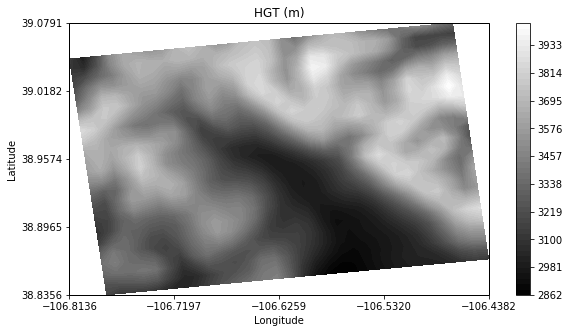

In [22]:
# Create two dimensional contour plot of HGT

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, hgt,
                     transform=projection,
                     cmap=cmap_h,
                     levels=levels_h)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')
ax.set_title("HGT (m)")
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "World_"+outfile
print(" Saving figure as hgt.png \n")
plt.savefig("hgt.png", facecolor='w', dpi = 400)

 Saving figure as swe_increment_gc_h 



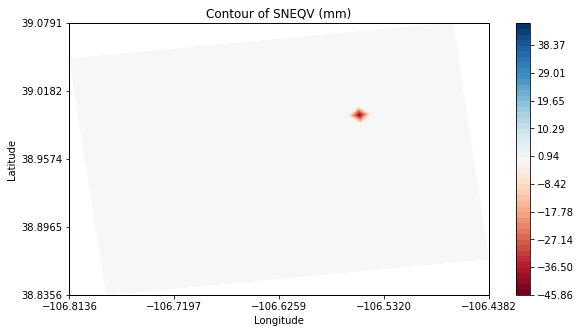

In [23]:
# Create two dimensional contour plot of field

# Set the projection
projection = ccrs.PlateCarree()

    # Create figure to hold plot
fig = plt.figure(figsize=(10, 5))

    # Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, increment,
                    transform=projection,
                     cmap=cmap,
                     levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(title)
#ax.set_global()

# Add a colorbar for the filled contour.
fig.colorbar(im)

# Show the figure
thisoutfile = "swe_increment_gc_h"
print(" Saving figure as", thisoutfile, "\n")
plt.savefig(thisoutfile, facecolor='w', dpi = 400)

In [24]:
np.max(lats)

39.079094